In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [2]:
df = pd.read_csv('data/epa-sea-level_csv.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN


In [3]:
df['Year'] = pd.to_datetime(df.Year, format='%Y-%m-%d')
df['Year'] = df.Year.dt.year

df.dropna(thresh=3, inplace=True)
df.sample(3)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
80,1960,4.503937,4.244094,4.763780,NaN
51,1931,2.047244,1.566929,2.527559,NaN
69,1949,3.511811,3.181102,3.842520,NaN


In [4]:
df.dtypes

Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

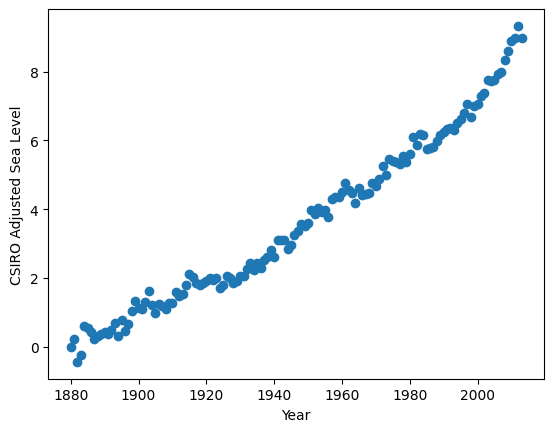

In [5]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

plt.scatter(x,y)
plt.xlabel("Year")
plt.ylabel('CSIRO Adjusted Sea Level')

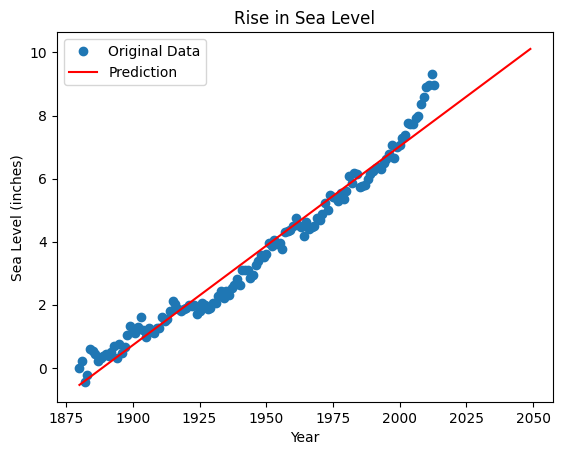

In [14]:
def draw_plot_pred():
    # Create first line of best fit
    result = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
    start_year = df["Year"].min()
    end_year = 2050
    best_fit = {
        "Year": [],
        "Pred": []
    }
    for year in range(start_year, end_year):
        best_fit["Year"] = [year for year in range(start_year, end_year)]
        best_fit["Pred"] = [result.slope * year + result.intercept for year in range(start_year, end_year)]

    plt.plot(df['Year'], df['CSIRO Adjusted Sea Level'], 'o', label='Original Data')
    plt.plot(best_fit["Year"], best_fit["Pred"], 'r', label='Prediction')
    plt.title('Rise in Sea Level')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.legend()
    plt.show()

draw_plot_pred()

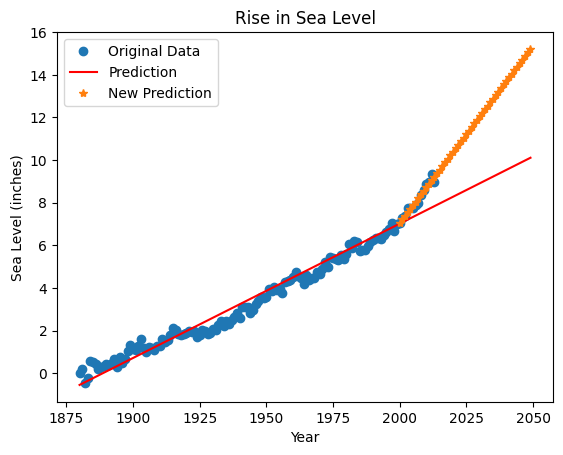

In [37]:
def draw_plot_next_pred():
    # Create first line of new fit
    result = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
    df2 = df[df.Year >= 2000]
    result2 = linregress(df2["Year"], df2["CSIRO Adjusted Sea Level"])
    
    start_year = df["Year"].min()
    start_year_2000 = 2000
    end_year = 2050
    best_fit = {
        "Year": [],
        "Pred": []
    }

    new_fit = {
        "Year2":[],
        "Pred2":[],
    }

    for year in range(start_year, end_year):
        best_fit["Year"] = [year for year in range(start_year, end_year)]
        best_fit["Pred"] = [result.slope * year + result.intercept for year in range(start_year, end_year)]
    
    for year2 in range(start_year_2000, end_year):
        new_fit["Year2"] = [year2 for year2 in range(start_year_2000, end_year)]
        new_fit["Pred2"] = [result2.slope * year2 + result2.intercept for year2 in range(start_year_2000, end_year)]

    plt.plot(df['Year'], df['CSIRO Adjusted Sea Level'], 'o', label='Original Data')
    plt.plot(best_fit["Year"], best_fit["Pred"], 'r', label='Prediction')
    plt.plot(new_fit["Year2"], new_fit["Pred2"], '*', label='New Prediction')
    plt.title('Rise in Sea Level')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.legend()
    plt.show()

draw_plot_next_pred()

In [36]:
df2 = df[df.Year >= 2000]

120    2000
121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64